In [1]:
# uniform

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 50,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)
C:\Users\tcumi\github_repo\neural-network\python\activations.py:14: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-Xi))


Checkpoint 100, Accuracy: 0.8333333333333334, Loss: 0.628311934294524
Checkpoint 200, Accuracy: 0.845679012345679, Loss: 0.6219441449200666
Checkpoint 300, Accuracy: 0.8518518518518519, Loss: 0.6045109784161603
Checkpoint 400, Accuracy: 0.8518518518518519, Loss: 0.5958992286964699
Checkpoint 500, Accuracy: 0.8641975308641975, Loss: 0.5830145941840278


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.8995737 ]
 [0.06856185]
 [0.03186443]]
[1. 0. 0.] <-> [[0.4693111 ]
 [0.2533531 ]
 [0.27733582]]
[1. 0. 0.] <-> [[0.7836127 ]
 [0.14607681]
 [0.0703105 ]]
[0. 0. 1.] <-> [[0.05973413]
 [0.32185727]
 [0.6184086 ]]
[1. 0. 0.] <-> [[0.9037773 ]
 [0.06666755]
 [0.02955511]]
[1. 0. 0.] <-> [[0.55219597]
 [0.2746765 ]
 [0.17312747]]
[1. 0. 0.] <-> [[0.90427923]
 [0.06662048]
 [0.02910035]]
[0. 0. 1.] <-> [[0.07925446]
 [0.45887175]
 [0.46187383]]
[1. 0. 0.] <-> [[0.90420157]
 [0.06662203]
 [0.02917642]]
[1. 0. 0.] <-> [[0.90463674]
 [0.06667788]
 [0.02868545]]
[1. 0. 0.] <-> [[0.70532405]
 [0.19779988]
 [0.09687604]]
[1. 0. 0.] <-> [[0.4803536 ]
 [0.25473917]
 [0.26490724]]
[1. 0. 0.] <-> [[0.9035946 ]
 [0.06670181]
 [0.0297036 ]]
[1. 0. 0.] <-> [[0.9018254 ]
 [0.06736719]
 [0.03080735]]
[0. 1. 0.] <-> [[0.5769588]
 [0.2677387]
 [0.1553025]]
[1. 0. 0.] <-> [[0.85703367]
 [0.09631713]
 [0.04664912]]
[1. 0. 0.] <-> [[0.9040115 ]
 [0.06663605]
 [0.02935246]]
[1. 0. 0.] <-> [[

In [12]:
# Testing Performance

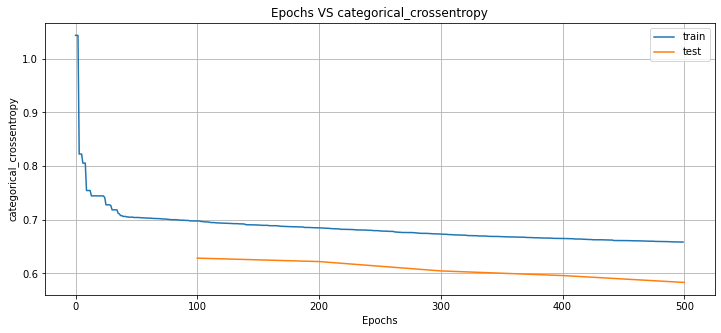

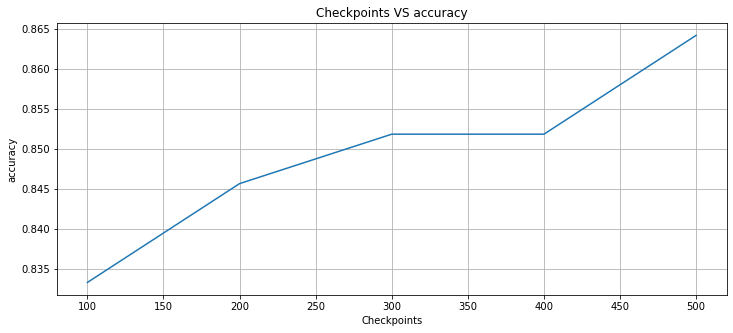

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8333333333333334, 'mean_square_error': 2.872274929730039, 'categorical_crossentropy': 0.628311934294524, 'precision': 0.75, 'recall': 0.75, 'f1': 0.75, 'essential_metrics': {0: {'tp_hit': 74, 'fp_hit': 11, 'tn_hit': 17, 'fn_hit': 6}, 1: {'tp_hit': 4, 'fp_hit': 7, 'tn_hit': 86, 'fn_hit': 11}, 2: {'tp_hit': 3, 'fp_hit': 9, 'tn_hit': 86, 'fn_hit': 10}}, 'checkpoint': 100} 


{'accuracy': 0.845679012345679, 'mean_square_error': 2.852524110063548, 'categorical_crossentropy': 0.6219441449200666, 'precision': 0.7685185185185185, 'recall': 0.7685185185185185, 'f1': 0.7685185185185186, 'essential_metrics': {0: {'tp_hit': 74, 'fp_hit': 11, 'tn_hit': 17, 'fn_hit': 6}, 1: {'tp_hit': 5, 'fp_hit': 7, 'tn_hit': 86, 'fn_hit': 10}, 2: {'tp_hit': 4, 'fp_hit': 7, 'tn_hit': 88, 'fn_hit': 9}}, 'checkpoint': 200} 


{'accuracy': 0.8518518518518519, 'mean_square_error': 2.8409534531435026, 'categorical_crossentropy': 0.6045109784161603, 'precision': 0.7777777777777778, 'recall': 0.777777777777

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[[-2.5691    ]
 [-0.76666737]
 [ 0.27735308]
 [ 1.8033959 ]
 [ 2.067739  ]]
 bias: [-2.6441405]

Neuron 1: weights:
[[ 1.1905837 ]
 [ 1.3302956 ]
 [ 0.03643248]
 [-1.6712817 ]
 [ 1.1016755 ]]
 bias: [-3.]

Neuron 2: weights:
[[-1.8324038 ]
 [ 0.424456  ]
 [-1.7370516 ]
 [-2.796358  ]
 [-0.25563735]]
 bias: [-1.4199235]

Neuron 3: weights:
[[ 0.3827366 ]
 [ 1.0095687 ]
 [-0.16558653]
 [ 1.4468504 ]
 [ 1.7026708 ]]
 bias: [0.07053016]

$
Layer 2
Neuron 0: weights:
[[-2.6487708 ]
 [-1.950703  ]
 [ 0.36544955]
 [-0.32909936]]
 bias: [-1.2705754]

Neuron 1: weights:
[[-3.       ]
 [ 1.1353377]
 [-2.8334944]
 [-2.0059726]]
 bias: [-0.6775287]

Neuron 2: weights:
[[-0.7684985 ]
 [-0.4731088 ]
 [-1.6689332 ]
 [ 0.25886643]]
 bias: [-2.6990073]

$

